In [1]:
#Use only for Binary class(threshold based) or for regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer
#Metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

In [2]:
X = pd.read_csv("train.csv")

In [3]:
y=X.pop("Survived")

In [4]:
#y=X['Survived']

In [4]:
test = pd.read_csv("test.csv")

In [5]:
X.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Astor, Col. John Jacob",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [7]:
X["Age"].fillna(X["Age"].mean(), inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#a=X["Age"].mean()

In [12]:
#a

In [8]:
test["Age"].mean()

30.272590361445783

In [9]:
test["Age"].fillna(test["Age"].mean(), inplace=True)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test["Fare"].fillna(test["Fare"].mean(), inplace=True)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
X.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
list(X.dtypes[X.dtypes != "object"].index)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
list(X.dtypes[X.dtypes!="object"].index)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
numeric_variables.remove('PassengerId')
X[numeric_variables]

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
5,3,29.699118,0,0,8.4583
6,1,54.000000,0,0,51.8625
7,3,2.000000,3,1,21.0750
8,3,27.000000,0,2,11.1333
9,2,14.000000,1,0,30.0708


In [14]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X[numeric_variables])

In [16]:
pd.DataFrame(scaled_X)

,0,1,2,3,4
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337
5,0.827377,0.000000,-0.474545,-0.473674,-0.478116
6,-1.566107,1.870059,-0.474545,-0.473674,0.395814
7,0.827377,-2.131568,2.247470,0.767630,-0.224083
8,0.827377,-0.207709,-0.474545,2.008933,-0.424256
9,-0.369365,-1.208115,0.432793,-0.473674,-0.042956


# Train Base Model- Using Numeric Values alone

In [17]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
#model.fit(X[numeric_variables], y)
#Try Base model with scaled data also
model.fit(scaled_X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [18]:
#OOB can be used only when we use RandomforestRegressor
y_oob = model.oob_prediction_
print("c_stat: ", roc_auc_score(y, y_oob))

# w/o scaler c_stat:  0.72695515504
# w scaler c_stat:  0.740210803268

c_stat:  0.7282352815858713


## Categorical Data

In [37]:
categorical_variables=list(X.dtypes[X.dtypes == "object"].index)

In [38]:
categorical_variables

[]

In [39]:
X[categorical_variables].describe()

ValueError: Cannot describe a DataFrame without columns

In [36]:
X.drop(["Name", "Ticket","Cabin"], axis=1, inplace=True)
test.drop(["Name", "Ticket","Cabin"], axis=1, inplace=True)

KeyError: "['Name' 'Ticket' 'Cabin'] not found in axis"

In [26]:
categorical_variables = ["Sex", "Embarked"]

for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [33]:
#X

In [27]:
for variable in categorical_variables:
    test[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(test[variable], prefix=variable)
    test = pd.concat([test, dummies], axis=1)
    test.drop([variable], axis=1, inplace=True)

In [35]:
#test

In [36]:
#X.describe()

In [37]:
#test.describe()

In [28]:
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Missing', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [29]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [30]:
X.drop(['PassengerId','Embarked_Missing'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [31]:
scaled_X = StandardScaler().fit(X).transform(X)

In [32]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(scaled_X, y)
print("c_stat: ", roc_auc_score(y, model.oob_prediction_))
# w/o scaler c_stat:  0.863521128261
# w/ scaler c_stat:  0.86386731857
#model.score()

c_stat:  0.8591138593295626


## Variable Importance Measures

In [40]:
# gives an array of the features in numerical form giving their order of importance
model.feature_importances_

array([0.10233502, 0.25074367, 0.04823071, 0.02378293, 0.23896417,
       0.13705049, 0.16704124, 0.01040975, 0.00635343, 0.01508858])

array([  9.11384671e-02,   2.38891052e-01,   4.43567267e-02,
         2.15831071e-02,   2.15047796e-01,   1.43423437e-01,
         1.58822440e-01,   2.95342368e-03,   3.79055011e-03,
         6.47116172e-03,   4.30998991e-03,   8.59480266e-03,
         1.02403226e-03,   8.12054428e-04,   2.67741854e-02,
         6.64265010e-05,   1.06189189e-02,   0.00000000e+00,
         6.00379221e-03,   1.53176370e-02])

In [46]:
#import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#from ipykernel import kernelapp as app

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

Pclass        0.102335
Age           0.250744
SibSp         0.048231
Parch         0.023783
Fare          0.238964
Sex_female    0.137050
Sex_male      0.167041
Embarked_C    0.010410
Embarked_Q    0.006353
Embarked_S    0.015089
dtype: float64


Parch       0.021583
Embarked    0.031940
SibSp       0.044357
Cabin       0.054797
Pclass      0.091138
Fare        0.215048
Age         0.238891
Sex         0.302246
dtype: float64


## Parameter Optimization

### n_jobs

In [48]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(scaled_X, y)

# w/o scaler 1 loop, best of 3: 3.78 s per loop
# w/ scaler 1 loop, best of 3: 3.74 s per loop
# 1 loop, best of 3: 3.71 s per loop

3.23 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(scaled_X, y)

# w/o scaler 1 loop, best of 3: 2.68 s per loop
# w/ scaler 1 loop, best of 3: 2.67 s per loop
# 1 loop, best of 3: 2.78 s per loop

2.04 s ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### n_estimators

30 trees
ROC-AUC:  0.8509384420370902
 
50 trees
ROC-AUC:  0.8552338648686075
 
100 trees
ROC-AUC:  0.8591138593295626
 
200 trees
ROC-AUC:  0.8583176216193185
 
500 trees
ROC-AUC:  0.8598115659519168
 
1000 trees
ROC-AUC:  0.861558495510178
 
2000 trees
ROC-AUC:  0.8621949530778982
 
3000 trees
ROC-AUC:  0.8618860448023519
 


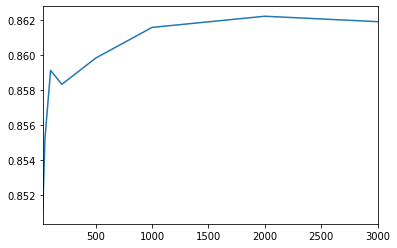

In [51]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000,3000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(scaled_X, y)
    print(trees, 'trees')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('ROC-AUC: ', roc)
    results.append(roc)
    print (" ")
    
pd.Series(results, n_estimator_options).plot()

### max_features

auto No_Of_features
AUC-ROC:  0.861558495510178
 
None No_Of_features
AUC-ROC:  0.861558495510178
 
sqrt No_Of_features
AUC-ROC:  0.8632495020185558
 
log2 No_Of_features
AUC-ROC:  0.8632495020185558
 
0.9 No_Of_features
AUC-ROC:  0.8621443560327655
 
0.2 No_Of_features
AUC-ROC:  0.8586984309590004
 
1 No_Of_features
AUC-ROC:  0.8599287380564344
 


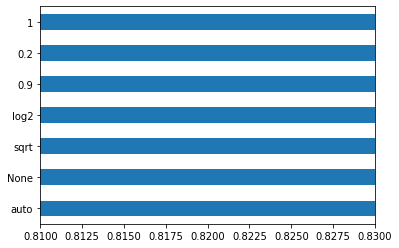

In [52]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2,1]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(scaled_X, y)
    print(max_features, "No_Of_features")
    roc = roc_auc_score(y, model.oob_prediction_)
    print('AUC-ROC: ', roc)
    results.append(roc)
    print (" ")
    
pd.Series(results, max_features_options).plot(kind='barh', xlim=(.81, .83))

### min_samples_leaf

1 min samples
C-stat:  0.861558495510178
 
2 min samples
C-stat:  0.8672306905697761
 
3 min samples
C-stat:  0.870969545904835
 
4 min samples
C-stat:  0.8735952662469774
 
5 min samples
C-stat:  0.8743648739334675
 
6 min samples
C-stat:  0.8744660680237327
 
7 min samples
C-stat:  0.8736245592731069
 
8 min samples
C-stat:  0.8719521937813568
 
9 min samples
C-stat:  0.8701307001565846
 
10 min samples
C-stat:  0.8681813824177931
 


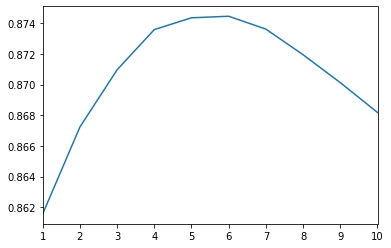

In [53]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    model.fit(scaled_X, y)
    print(min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat: ', roc)
    results.append(roc)
    print (" ")
    
pd.Series(results, min_samples_leaf_options).plot()

## Final Model

In [54]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.7, 
                              min_samples_leaf=5)
model.fit(scaled_X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print('C-stat: ', roc)
# w/o scaler C-stat:  0.874269005848
# w/ scaler C-stat:  0.874380851948

C-stat:  0.8744873720427359


In [55]:
#Find the Log-Loss (Cross Entropy)-- > Regressor
from sklearn.metrics import log_loss
log_loss(y, model.oob_prediction_)

0.4200060707634869

# Train Data used again for evaluation

# Train Data Evaluation

In [56]:
train_X_evaluation = scaled_X
train_y_evaluation= y

In [57]:
pred = model.predict(train_X_evaluation)

In [58]:
import numpy as np
train_prediction = Binarizer(threshold=0.55).fit(pred.reshape(-1, 1)).transform(pred.reshape(-1, 1))

In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_y_evaluation, train_prediction))

[[522  27]
 [ 85 257]]


In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_y_evaluation, train_prediction))

0.8742985409652076


In [61]:
from sklearn.metrics import classification_report
target_names=['survived','not-survived']
print(classification_report(train_y_evaluation, train_prediction, target_names=target_names))

              precision    recall  f1-score   support

    survived       0.86      0.95      0.90       549
not-survived       0.90      0.75      0.82       342

    accuracy                           0.87       891
   macro avg       0.88      0.85      0.86       891
weighted avg       0.88      0.87      0.87       891



In [62]:
print("c_stat: ", roc_auc_score(train_y_evaluation, train_prediction))

c_stat:  0.8511408302176204


In [64]:
pred.reshape(-1, 1)

array([[0.06656972],
       [0.9996627 ],
       [0.47508965],
       [0.99992308],
       [0.0774165 ],
       [0.16122158],
       [0.11776401],
       [0.43516263],
       [0.64789351],
       [0.97978731],
       [0.73557194],
       [0.8415363 ],
       [0.15730171],
       [0.06424844],
       [0.5990929 ],
       [0.82790302],
       [0.23806859],
       [0.21289206],
       [0.55060356],
       [0.73459712],
       [0.04578603],
       [0.19423463],
       [0.73951659],
       [0.42808974],
       [0.29627244],
       [0.20618259],
       [0.05911239],
       [0.31724732],
       [0.82191134],
       [0.01230944],
       [0.3649169 ],
       [0.9877772 ],
       [0.74345713],
       [0.14618195],
       [0.39612938],
       [0.31867587],
       [0.10629401],
       [0.05889093],
       [0.35336888],
       [0.62142651],
       [0.23036918],
       [0.79622332],
       [0.13049215],
       [0.93440224],
       [0.77969121],
       [0.03847367],
       [0.11304627],
       [0.743

In [67]:
#Changing the threshold
import numpy as np
train_prediction = Binarizer(threshold=0.70).fit(pred.reshape(-1, 1)).transform(pred.reshape(-1, 1))

In [68]:
from sklearn.metrics import classification_report
target_names=['survived','not-survived']
print(classification_report(train_y_evaluation, train_prediction, target_names=target_names))

              precision    recall  f1-score   support

    survived       0.82      0.98      0.89       549
not-survived       0.94      0.65      0.77       342

    accuracy                           0.85       891
   macro avg       0.88      0.81      0.83       891
weighted avg       0.87      0.85      0.84       891



In [69]:
print("c_stat: ", roc_auc_score(train_y_evaluation, train_prediction))

c_stat:  0.8112597066436584


### Predictions

In [70]:
scaled_test = StandardScaler().fit(test).transform(test)

In [71]:
#scaled_test[:10]

In [72]:
import numpy as np
prediction=model.predict(scaled_test)

In [73]:
b_prediction = Binarizer(threshold=0.55).fit(prediction.reshape(-1, 1)).transform(prediction.reshape(-1, 1))

In [75]:
#print(b_prediction)

# Ignore-Support Vector Machine

In [57]:
from sklearn import svm, model_selection

svc = svm.SVC()

#svc.fit(X, y)
svc.fit(scaled_X, y)

scores = model_selection.cross_val_score(svc, scaled_X, y)
print(scores)
print(scores.mean())


[ 0.79461279  0.82154882  0.82491582]
0.813692480359


[ 0.79461279  0.82154882  0.82491582]
0.813692480359

[ 0.79888268  0.79329609  0.79775281  0.79775281  0.83615819]
0.804768516204

[ 0.78888889  0.76666667  0.7752809   0.79775281  0.82022472  0.78651685
  0.79775281  0.78651685  0.88764045  0.81818182]
0.8025422767

In [76]:
from sklearn import linear_model, preprocessing

lr = linear_model.LogisticRegression()
lr.fit(scaled_X, y)

print(lr.score(scaled_X, y))

poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(scaled_X)

lr_ = lr.fit(poly_features, y)
print(lr_.score(poly_features, y))


0.8002244668911336
0.8305274971941639


C:\Users\SHELLY_BENZY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SHELLY_BENZY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
